In [1]:
import matplotlib.pyplot as plt

In [2]:
import os
import glob
import cv2
import numpy as np

In [3]:
labeldir = "/home/kunaldargan/ROBO_SURGERY/MaskRCNNData/data_maskrcnn_clips/E3/E3_t1/temp"

In [4]:
img_files = sorted(glob.glob(labeldir+"/*.jpg"))
lbl_files = sorted(glob.glob(labeldir+"/*.json"))

In [5]:
print(img_files[0])
print(lbl_files[0])

/home/kunaldargan/ROBO_SURGERY/MaskRCNNData/data_maskrcnn_clips/E3/E3_t1/temp/0050.jpg
/home/kunaldargan/ROBO_SURGERY/MaskRCNNData/data_maskrcnn_clips/E3/E3_t1/temp/0050.json


In [6]:
import json

In [7]:
f = open(lbl_files[0],'r')
data = json.load(f)

In [8]:
im = cv2.imread(img_files[0])

In [9]:
data

{'version': '4.2.9',
 'flags': {},
 'shapes': [{'id': 1,
   'label': 'disk1',
   'points': [[351.0, 684.0],
    [341.0, 708.0],
    [314.0, 730.0],
    [266.0, 739.0],
    [213.0, 717.0],
    [201.0, 691.0],
    [210.0, 648.0],
    [236.0, 625.0],
    [292.0, 616.0],
    [324.0, 627.0],
    [349.0, 663.0]],
   'group_id': None,
   'shape_type': 'polygon',
   'flags': {}},
  {'id': 2,
   'label': 'disk2',
   'points': [[567.0, 389.0],
    [554.0, 409.0],
    [519.0, 421.0],
    [460.0, 413.0],
    [441.0, 395.0],
    [435.0, 366.0],
    [449.0, 336.0],
    [525.0, 325.0],
    [560.0, 347.0]],
   'group_id': None,
   'shape_type': 'polygon',
   'flags': {}},
  {'id': 3,
   'label': 'disk3',
   'points': [[546.0, 497.0],
    [531.0, 540.0],
    [493.0, 561.0],
    [438.0, 554.0],
    [421.0, 540.0],
    [415.0, 497.0],
    [429.0, 471.0],
    [519.0, 459.0]],
   'group_id': None,
   'shape_type': 'polygon',
   'flags': {}},
  {'id': 5,
   'label': 'disk5',
   'points': [[348.0, 377.0],
  

In [10]:
out_data = {}

In [11]:
def apply_mask(image, mask, color, alpha=0.5):
    """Apply the given mask to the image.
    """
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image

In [12]:
font = cv2.FONT_HERSHEY_SIMPLEX 
  
# org 
  
# fontScale 
fontScale = 1
   
# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
   

   
for d in data['shapes']:
    points =np.array(d["points"], np.int32)
    print(d["id"])
    M = cv2.moments(points)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    org = (cX, cY) 
    

    cv2.drawContours(im,[points], -1, (255,255,255), -1)
    # Using cv2.putText() method 
    im = cv2.putText(im, str(d["id"]), org, font,  
                   fontScale, color, thickness, cv2.LINE_AA) 
    

1
2
3
5
4
7
0


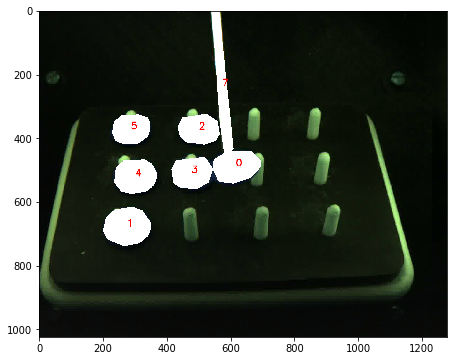

In [13]:
plt.figure(figsize=(8,6))
plt.imshow(im)

In [14]:
if not  os.path.exists("output"):
    os.mkdir("output")
for lbl in lbl_files:
    f = open(lbl,'r')
    data = json.load(f)
    base = os.path.basename(lbl)
    try:
        for d in data["shapes"]:
            if d["id"] == 2:
                d["label"] = "disk2"
            if d["id"] == 3:
                d["label"] = "disk1"
            
    except:
        print(lbl)

    ff =open("output/"+base,'w')
    json.dump(data,ff)
                
    